In [98]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from statsmodels.graphics.api import qqplot

# Selecci'on de modelos ARMA

Referencias Bibliografica

Capitulo 2 de Walter Enders Applied Time Series Econometrics

En la práctica, se desconoce la forma del proceso subyacente que generó los datos. ¿Deberíamos estimar un modelo $AR(p)$, un modelo $MA(q)$ o un modelo $ARMA(p, q)$? Además, ¿cu\'al es el n'umero de rezados $p$ y $q$ que deber\'iamos elegir? Simplemente no tenemos una buena razón a priori para sospechar que el proceso de generación de datos es de un tipo u otro, o una combinación de los dos. ¿Cómo se debe proceder? ¿Qué tipo de modelo debemos estimar?

<img src="fig4.png">

A menudo es imposible saber visualmente si una serie temporal es un proceso AR o MA. Considere la figura previa que muestra cuatro series de tiempo: un proceso $AR(1)$, un proceso $MA(1)$ y dos procesos $ARMA(p,q)$. Es imposible saberlo visualmente. Necesitamos algo un poco más formal, algo que se base en los diferentes procesos estadísticos asociados con los modelos AR y MA.

El procedimiento clásico [Box y Jenkins (1976)](#Referencias)  consiste en verificar *si una serie temporal imita las propiedades de varios modelos te\'oricos antes de que se realice la estimación*. Estas propiedades implican comparar las **funciones de autocorrelación estimadas (ACF)** y las **funciones de autocorrelación parcial (PACF)** de los datos, con los ACF  y PACF teóricos implicados por los diversos tipos de modelos. Un enfoque más reciente es utilizar varios "criterios de información" para ayudar en la selección del modelo. 

A continuaci\'on discutiremos estos dos procedimientos. Comenzamos derivando los ACF y PACF teóricos para los procesos $AR(p)$ y $MA(q)$. Una vez que conocemos los signos reveladores de estos procesos, podemos verificar si nuestros datos corresponden a uno o ambos procesos. Luego estimamos el modelo. El procedimiento de Box-Jenkins se concluye verificando que los residuos estimados son **ruido blanco** ($e_t \sim iidN(0,\sigma^2)$. Esto implica que no hay estructura por ser modelada en los datos. Si los residuos no son ruido blanco, Box y Jenkins recomiendan modificar el modelo, volver a estimar y volver a examinar los residuos. Es un proceso complicado. Pero la parte central de su procedimiento compara la estructura de autocorrelación de los datos con la autocorrelación implicada teóricamente por varios procesos. 

## ACF y PACF

Los ACF y PACF vienen en dos aspectos: teórico y empírico. El primero está implícito en un modelo; este último es una característica de los datos. Podemos comparar (a) los ACF y PACF empíricos que estimamos directamente a partir de los datos sin usar un modelo, con (b) los ACF y PACF teóricos que están asociados con un modelo en particular. Entonces, solo necesitamos ver cómo se combinan. Es decir, podemos estar bastante seguros de que los datos se generaron a partir de un tipo particular de proceso (modelo) si el ACF empírico coincide con el de los ACF teóricos de un modelo en particular.

## ACF y PACF: AR(1)

Derivemos ahora el ACF teórico de un proceso AR (1):
$X_t = βX_{t − 1} + e_t.$
Un ACF es una descripción de cómo $Xt$ se correlaciona con su primer retraso, su segundo retraso, hasta su k-ésimo retraso. Para encontrar el ACF teórico para un proceso $AR (1)$, derivemos los valores de $Corr (X_t, X_{t-1}))$, $Corr (X_t, X_{t-2}))$,. . .,$Corr (X_t, X_{t-k}))$, bajo el supuesto de que $X_t \sim AR(1)$.

Recuerde que la $Corr(x_t,x_{t-k})=\frac{cov(x_t,x_{t-k})}{\sqrt{Var(x_{t})}\sqrt{Var(x_{t-k})}}\underset{}{=}\frac{cov(x_t,x_{t-k})}{Var(x_{t})}$

Aplicando las definiciones tenemos que $Corr(x_t,x_{t-k})=\beta^k$



### Generacion de un modelo AR(1) con datos ficticios

In [215]:
arparams = np.array([1, .5])
maparams = np.array([1])

nobs = 240

y = arma_generate_sample(arparams, maparams, nobs)

In [216]:
y=pd.DataFrame(y, columns=['y'])
y.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

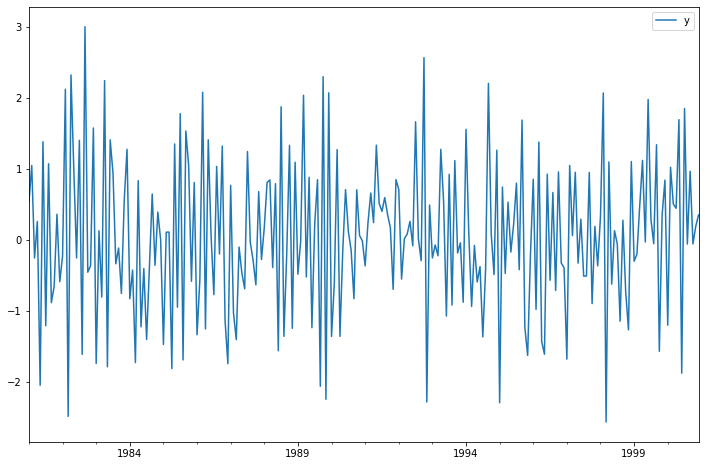

In [217]:
y.plot(figsize=(12,8))

In [218]:
# Generar el modelo
model = sm.tsa.SARIMAX(y, order=(1,0,0), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -327.474
Date:                Sat, 13 Jun 2020   AIC                            658.948
Time:                        14:24:55   BIC                            665.909
Sample:                    01-31-1981   HQIC                           661.753
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4787      0.056     -8.564      0.000      -0.588      -0.369
sigma2         0.8958      0.088     10.225      0.000       0.724       1.068
Ljung-Box (Q):                       53.05   Jarque-

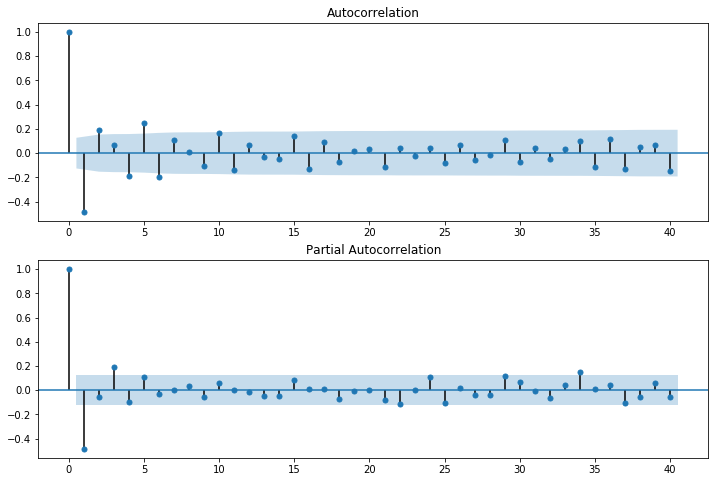

In [219]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [ ]:
# Evaluando los residuos estimados

In [90]:
sm.stats.durbin_watson(results.resid.values)

2.1935782637228685

In [101]:
resid = results.resid

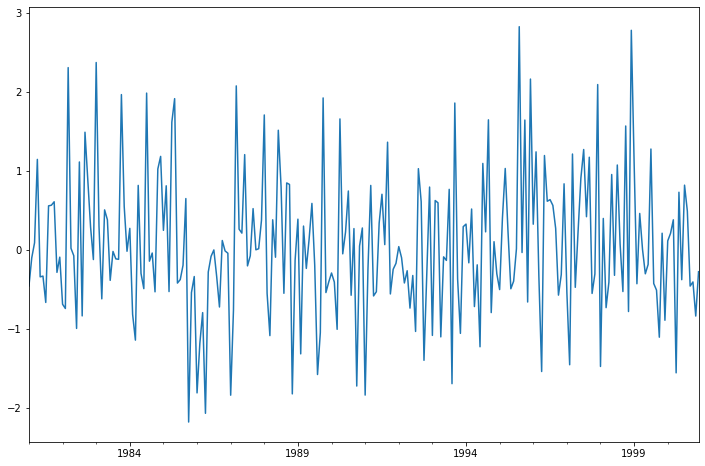

In [92]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax = results.resid.plot(ax=ax);

In [97]:
stats.normaltest(results.resid)

NormaltestResult(statistic=7.18666541877857, pvalue=0.027506506304860394)

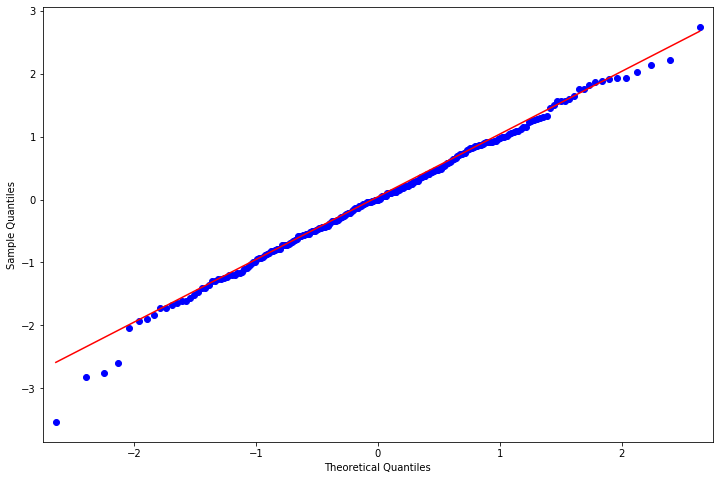

In [189]:
# qqplot displays a quantile-quantile plot of the quantiles of the sample data x 
# versus the theoretical quantile values from a normal distribution. 
# If the distribution of x is normal, then the data plot appears linear.

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(results.resid, line='q', ax=ax, fit=True)

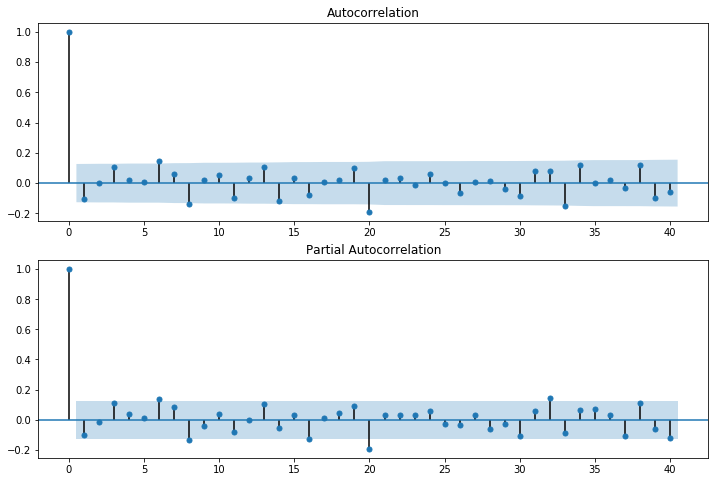

In [102]:
# ACF y PACF de los residuos

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [137]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
# print(table.set_index('lag'))

## ACF y PACF: MA(1)

Es importante conocer el ACF teórico de un proceso de MA (1), porque tendremos que comparar nuestro ACF estimado con el teórico, para evaluar si, de hecho, estamos viendo un proceso de MA (1) .
¿Cómo se correlacionan las X en diferentes rezagos entre sí? Nuestro modelo MA (1), una vez más, es

$X_t = u_t + \beta u_{t − 1}$

con $u_t \sim iidN(0,\sigma_u^2$

Es decir, los términos de error $u$ son ruido blanco, independientes entre sí. Por lo tanto,

$Cov(u_t,u_t)=Var(u_t)= \sigma_u^2$

$Cov(u_t, u_j) = E (u_t,u_j) = 0, \forall t = j$
¿Cuál es el ACF de X en el retraso 1?

In [206]:
arparams = np.array([1])
maparams = np.array([1, 0.5])

nobs = 240

u = arma_generate_sample(arparams, maparams, nobs)

In [207]:
u=pd.DataFrame(u, columns=['u'])
u.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

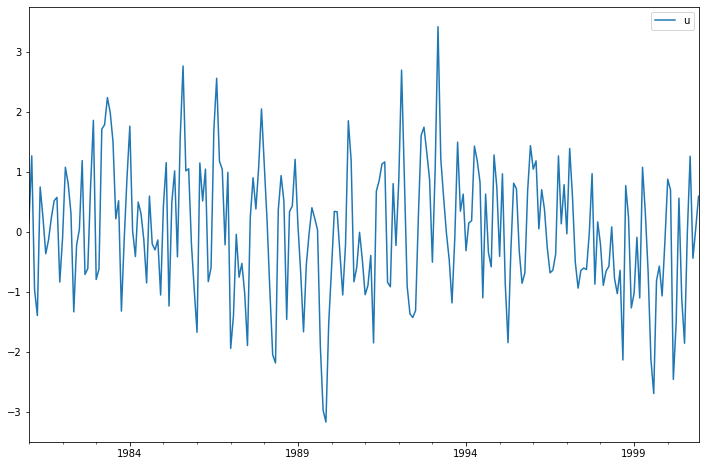

In [208]:
u.plot(figsize=(12,8))

In [229]:
# Generar el modelo
ma1 = sm.tsa.SARIMAX(u, order=(0,0,1), trend=None)

# Estimar los parametros del modelo
results_ma1 = ma1.fit()

print(results_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                      u   No. Observations:                  240
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -332.873
Date:                Sat, 13 Jun 2020   AIC                            669.747
Time:                        22:00:07   BIC                            676.708
Sample:                    01-31-1981   HQIC                           672.552
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4725      0.056      8.441      0.000       0.363       0.582
sigma2         0.9371      0.094      9.960      0.000       0.753       1.121
Ljung-Box (Q):                       55.70   Jarque-

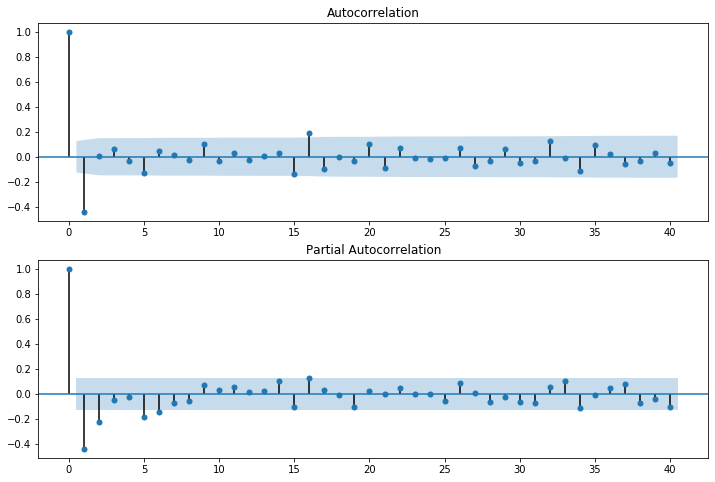

In [212]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

## Resumen: ACF  y PACF teóricos


Los ACF y PACF teóricos mostrarán las siguientes características:

1) Para procesos AR (p):
- Los ACF se descomponen lentamente.
- Los PACF muestran picos en los retrasos 1 a p, con ceros después.

2) Para procesos de MA (q):
- Los ACF muestran picos en los rezagos 1 a q, con ceros después.
- Los PACF se descomponen lentamente, a menudo con oscilación.

3) Para procesos ARMA (p, q):
- Los ACF decaen lentamente.
- Los PACF se descomponen lentamente.

## Criterios de informacion

Los  "criterios de información" son utilizados de la misma manera que los economometristas anteriores compararon modelos a través de la estadística $R^2$. En pocas palabras, los criterios de información penalizan la probabilidad logarítmica por algunas razones: dependiendo del número de observaciones y el número de estadísticas estimadas. Todos los criterios de información (IC) tienen, en su base, alguna versión de la función de probabilidad. Muchos  software econométricos utilizan variaciones de las fórmulas de criterios de información. Algunos  software apuntan a maximizar la probabilidad, otros la probabilidad en logaritmo, y otros buscan minimizar el negativo de la probabilidad. Independientemente de la forma que cada programa implemente el criterio, la idea básica es la misma. Queremos una estadística que nos pueda dar una idea de qué tan bien un modelo particular se ajusta a un conjunto particular de datos. 

Tres criterios de informacion estudiamos:

- [Criterio de informaci\'on bayesiano](https://en.wikipedia.org/wiki/Akaike_information_criterion) (BIC)
- [Criterio de informaci\'on de Akaike](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (AIC)
- [Criterio de informacion de Hannan–Quinn information criterion](https://en.wikipedia.org/wiki/Hannan%E2%80%93Quinn_information_criterion) (HQIC) 

El criterio de información de Akaike $AIC = −2ln(L) + 2k$, donde $ln(L)$ es la log-verosimilitud maximizada  del modelo y k es el número de parámetros estimados. El criterio de información bayesiano $BIC = −2ln(L) + kln(N)$, donde N es el tamaño de la muestra. El criterio Hannan-Quinn es $HQIC=-2\hat{L}+2k\ln(\ln(N)$

Los dos primeros IC penalizan (−2 veces el negativo de) la función de probabilidad agregando una penalización; Esta penalización depende del número de parámetros estimados y del tamaño de la muestra. El mejor modelo (el que mejor se ajusta a los datos) es el que está asociado con la mayor probabilidad. Los mejores modelos tienen los criterios de información más pequeños. Más pequeño es mejor.

In [224]:
import warnings

aic = pd.DataFrame(np.zeros((6,6), dtype=float))
bic = pd.DataFrame(np.zeros((6,6), dtype=float))
hqic = pd.DataFrame(np.zeros((6,6), dtype=float))

warnings.simplefilter('ignore')

# Iterate over all ARMA(p,q) models with p,q in [0,6]
for p in range(6):
    for q in range(6):
        if p == 0 and q == 0:
            continue

        # Estimate the model with no missing datapoints
        mod = sm.tsa.statespace.SARIMAX(y, order=(p,0,q), enforce_invertibility=False)
        try:
            res = mod.fit(disp=False)
            aic.iloc[p,q] = res.aic
            bic.iloc[p,q] = res.bic
            hqic.iloc[p,q] = res.hqic
        except:
            aic.iloc[p,q] = np.nan
            bic.iloc[p,q] = np.nan
            hqic.iloc[p,q] = np.nan

#         # Estimate the model with missing datapoints
#         mod = sm.tsa.statespace.SARIMAX(dta_miss, order=(p,0,q), enforce_invertibility=False)
#         try:
#             res = mod.fit(disp=False)
#             aic_miss.iloc[p,q] = res.aic
#         except:
#             aic_miss.iloc[p,q] = np.nan

In [227]:
hqic

,0,1,2,3,4,5
0,0.000000,674.100436,660.984975,663.872220,667.273958,667.129817
1,661.752945,664.810517,663.967702,665.479897,666.465915,667.135850
2,664.543983,659.635740,657.613265,660.647850,661.415952,664.575281
3,659.245195,658.217202,659.182588,664.067274,664.289621,668.170104
4,660.499657,661.566219,661.806818,664.117940,667.444054,671.036438
5,660.640427,663.795775,663.933473,667.414917,670.301702,674.273794


# Ejemplo 

In [139]:
# In-sample one-step-ahead predictions
predict = results.get_prediction()
predict_ci = predict.conf_int()

In [172]:
# Dynamic predictions
predict_dy = results.get_prediction(dynamic= '1995-01-01')
predict_dy_ci = predict_dy.conf_int()

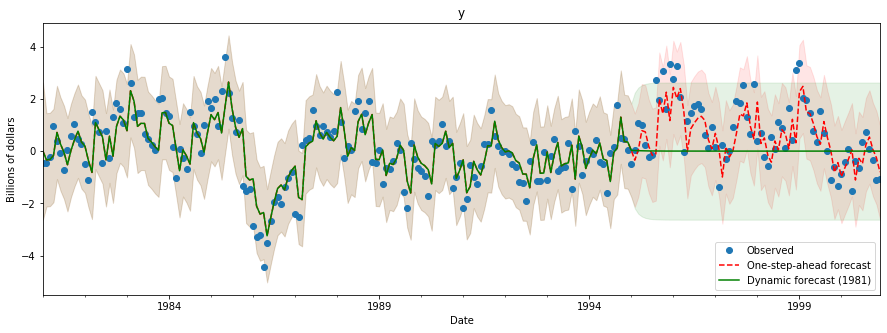

In [174]:
# Graph
fig, ax = plt.subplots(figsize=(15,5))
# npre = 4
ax.set(title='y', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
y.loc['1981-01-01':, 'y'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['1981-01-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1981-01-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

predict_dy.predicted_mean.loc['1981-01-01':].plot(ax=ax, style='g', label='Dynamic forecast (1981)')
ci = predict_dy_ci.loc['1981-01-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [235]:
df = pd.read_csv(r'C:\Users\lfsanche\OneDrive - Escuela Superior Politécnica del Litoral\Teaching\articles_colussi.csv')

In [239]:
journal=df.groupby(['journal','year']).nunique()

In [238]:
journal

articletitle  year  journal
journal year                             
AER     2000            78     1        1
        2001            88     1        1
        2002            92     1        1
        2003            90     1        1
        2004            79     1        1
        2005            88     1        1
        2006            88     1        1
ECA     2000            51     1        1
        2001            63     1        1
        2002            90     1        1
        2003            59     1        1
        2004            61     1        1
        2005            54     1        1
        2006            51     1        1
JPE     2000            49     1        1
        2001            44     1        1
        2002            48     1        1
        2003            42     1        1
        2004            46     1        1
        2005            41     1        1
        2006            36     1        1
QJE     2000            42     1        1
        2001            42     1        1
        2002            40     1        1
        2003            40     1        1
        2004            40     1        1
        2005            40     1        1
        2006            38     1        1

# Referencias


- Box, G. E., & Jenkins, G. M. (1976). Time series analysis: Forecasting and control (revised ed.). Oakland: Holden-Day.